## Project Name: Zomato Data Analysis

### Project Objective:
Using Zomato dataset we try to find out following questions answer:
   1. Top 3 countries that uses the zomato?
   2. The country names that has given 0 rating?
   3. Which currency is used by which country?
   4. Which countries do have online Delivery options?
   5. List countries which have or have not online delivery options?
   6. Created a pie chart for top 5 cities distribution?
   7. Find the top 10 Cuisines?
   
### Analysis Involve Phases:
1. Data collection
2. Data Cleaning & Preparation
3. Data Analysis

## Phase 1. Data Collection
We are using two datasets:
1. Zomato dataset which include restaurant information along with its ratings details.
2. Country dataset that helps us to add country information from its country code from Zomato dataset.

In [2]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

In [3]:
# Zomato dataset
df=pd.read_csv('zomato.csv')

In [4]:
# Country code dataset
df_country=pd.read_excel('Country-Code.xlsx')

In [5]:
# Merge two datasets on Country_Code column
final_df=pd.merge(df,df_country,on='Country Code',how='left')

## Phase 2. Data Cleaning & Preparation

#### Fix dataframe column names


In [6]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [7]:
final_df = final_df.rename(columns={'Restaurant ID':'restaurant_id', 
                         'Restaurant Name': 'restaurant_name', 
                         'Country Code': 'country_code', 
                         'City': 'city', 
                         'Address': 'address',
                         'Locality': 'locality', 
                         'Locality Verbose': 'locality_verbose', 
                         'Longitude':'longitude', 
                         'Latitude': 'latitude', 
                         'Cuisines': 'cuisines',
                         'Average Cost for two': 'average_cost_for_two', 
                         'Currency':'currency', 
                         'Has Table booking': 'has_table_booking',
                         'Has Online delivery': 'has_online_delivery', 
                         'Is delivering now': 'is_delivering_now', 
                         'Switch to order menu':'switch_to_order_menu',
                         'Price range': 'price_range', 
                         'Aggregate rating': 'aggregate_rating', 
                         'Rating color': 'rating_color', 
                         'Rating text': 'rating_text',
                         'Votes': 'votes', 
                         'Country': 'country'
                        })

In [8]:
final_df.describe()

,restaurant_id,country_code,longitude,latitude,average_cost_for_two,price_range,aggregate_rating,votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
final_df.city.nunique()

141

In [10]:
final_df.shape

(9551, 22)

### Observation: 
1. restaurant_id: 
- Unique id for each restaurant across various cities of the world
- Also this column is Primary key column in table. (Total number of rows in dataset: 9551 and total unique restarant ids are 9551.)

2. restaurant_name:
- Restaurant name belongs to its id.

3. country_code:
- Code for each country.
- Country in which restaurant is located
- There are total 15 unique country codes in this dataset.

4. city:
- City in which restaurant is located
- There are total 141 cities data

4. address:
- Address of restaurants

5. locality
- Locality of restaurants in the city
- There are total 1208 unique locality

6. locality_verbose
- Represents detailed description of the locality
- We can drop  either 'locality' or 'locality_verbose' columns as it contains similar information.
 
7. longitude
- Represents geographical longitude coordinate of the restaurant’s location

8. latitude
- Represents geographical latitude coordinate of the restaurant’s location


9. cuisines
- Represents different types of Cusines offered by. the restaurant
- There are total 1825 unique cuisines.
- There are total 9 null values in cuisines.

10. average_cost_for_two
- Represents average cost for 2 persons in different currencies (local currency)

11. currency
- Represents Currency of every country
- There are 12 unique currency

12. has_table_booking
- Represents whether the restaurant has table booking or not
- It is boolean datatype 

13. has_online_delivery
- Represents whether the restaurent has online delivery option or not
- It is boolean datatype

14. is_delivering_now
- Represents whether the restaurent will be able to deliver at specific timing
- It is boolean datatype

15. switch_to_order_menu
- It is boolean data type
- It has 9551 No records

16. price_range
- represents range of price of food
- There are total 4 unique values in price range.
- It is a array which contains [1,2,3,4].

17. aggregate_rating
- Represents rating of restaurant out of 5
- There are toatal 33 unique values in aggregate_rating.
 
18. rating_color
- There are total 6 unique rating colour with respect to aggregate rating column.
- Represents colour to specific range  with reference to aggregate_rating column.

19. rating_text
- there are total 6 unique rating text with respect to aggregate rating column.
- represents rating text of restaurant

20. votes 
- Represents number of ratings given to specific restaurant.

21. country
- Represents country of restaurant
- There are total 15 unique countries in dataset






'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes', 'country'

In [11]:
final_df.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [12]:
final_df.country.nunique()

15

In [13]:
final_df.is_delivering_now.value_counts()

No     9517
Yes      34
Name: is_delivering_now, dtype: int64

In [14]:
final_df.has_online_delivery.value_counts()

No     7100
Yes    2451
Name: has_online_delivery, dtype: int64

In [15]:
final_df.switch_to_order_menu.value_counts()

No    9551
Name: switch_to_order_menu, dtype: int64

In [16]:
final_df['is_delivering_now']

0       No
1       No
2       No
3       No
4       No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: is_delivering_now, Length: 9551, dtype: object

In [17]:
final_df[final_df['is_delivering_now']=='Yes']

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
787,122003,The Night Factory,1,Chandigarh,"Phase 1, Chandigarh Industrial Area, Chandigarh",Chandigarh Industrial Area,"Chandigarh Industrial Area, Chandigarh",76.801234,30.710055,"North Indian, Chinese, Continental, Pizza",...,No,Yes,Yes,No,2,3.7,Yellow,Good,665,India
1343,18204847,Cake 24x7,1,Gurgaon,"S-27/9, Shop 5, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.103839,28.487475,Bakery,...,No,Yes,Yes,No,2,3.3,Orange,Average,25,India
1345,18294819,Cake Point,1,Gurgaon,"U-1/29, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.093903,28.490241,"Bakery, Desserts",...,No,Yes,Yes,No,2,2.9,Orange,Average,7,India
1356,305096,Grandma's Kitchen,1,Gurgaon,"16/26, U Block, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.093633,28.491470,"North Indian, South Indian",...,No,Yes,Yes,No,1,2.5,Orange,Average,20,India
1403,311494,Dabba Meat,1,Gurgaon,"Opposite Hamilton Court, Galleria Road, DLF Ph...",DLF Phase 4,"DLF Phase 4, Gurgaon",77.087429,28.468104,North Indian,...,No,Yes,Yes,No,2,3.1,Orange,Average,195,India
1411,18070480,Monster's Cafe,1,Gurgaon,"Opposite DLF Galleria Market, DLF Phase 4, Gur...",DLF Phase 4,"DLF Phase 4, Gurgaon",77.085987,28.469781,"Continental, North Indian, Chinese",...,No,Yes,Yes,No,3,3.5,Yellow,Good,269,India
1470,305790,Captain Bill$ Deliverz,1,Gurgaon,"Golf Course Road, Gurgaon",Golf Course Road,"Golf Course Road, Gurgaon",77.089323,28.432310,"North Indian, Chinese, Fast Food",...,No,Yes,Yes,No,3,2.7,Orange,Average,185,India
1534,313204,E Yum,1,Gurgaon,"Plot H-16/6, MG Road, Gurgaon",MG Road,"MG Road, Gurgaon",77.100318,28.477732,"Continental, Italian, Mexican",...,No,Yes,Yes,No,2,3.4,Orange,Average,69,India
1769,18025110,Captain Bill$ Deliverz,1,Gurgaon,"Near Main Market, Sector 14, Gurgaon",Sector 14,"Sector 14, Gurgaon",77.047659,28.473865,"North Indian, Chinese, Fast Food",...,No,Yes,Yes,No,3,2.4,Red,Poor,23,India
1988,18439540,Ullu Delivers,1,Gurgaon,"C Block, Near HUDA Market, Sector 56, Gurgaon",Sector 56,"Sector 56, Gurgaon",77.099319,28.425040,"North Indian, Chinese",...,No,Yes,Yes,No,2,2.8,Orange,Average,5,India


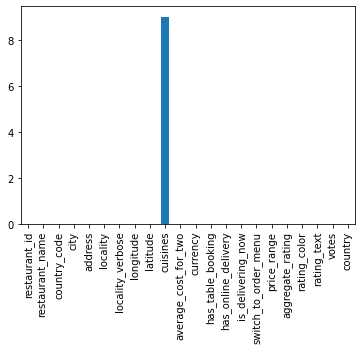

In [18]:
# Check which columns have null values graphically
(final_df.isnull().sum()).plot.bar()
rcParams['figure.figsize'] = 5,5

### Observation:
- Data is almost clean.
- We have 9 null values into Cuisines columns.
- As this columns doesn't effect other column values hence we are keeping as it's.

In [19]:
# final_df[final_df.Cuisines.isnull()]

### Data Analysis

#### Q.1: Top 3 countries that uses the zomato?

In [22]:
final_df.country.value_counts()

India             8652
United States      434
United Kingdom      80
South Africa        60
Brazil              60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: country, dtype: int64

In [26]:
country_names = final_df.country.value_counts().index

In [71]:
country_val = final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7fb312ce80d0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.030157837943120734, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.016449729787156763, '0.87%')])

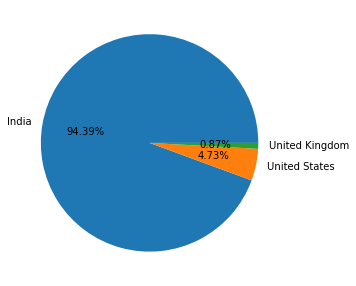

In [72]:
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')

### Observation
- Maximum number of transctions is in India
- Zomato maximum records are from India followed by USA and united Kingdom

In [27]:
ratings=final_df.groupby(['aggregate_rating','rating_color','rating_text']).size().reset_index().rename(columns={0:'rating_count'})

In [13]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# Observation

1. When rating is between 4.5 to 4.9  --->Excellent
2. When rating is between 4.0 to 4.4  --->Very good
3. When rating is between 3.5 to 3.9  --->good
4. When rating is between 2.5 to 3.4  --->Average
5. When rating is between 1.8 to 2.4  --->Poor


 #### Q.2 Find maximum number of rating?

<AxesSubplot:xlabel='aggregate_rating', ylabel='rating_count'>

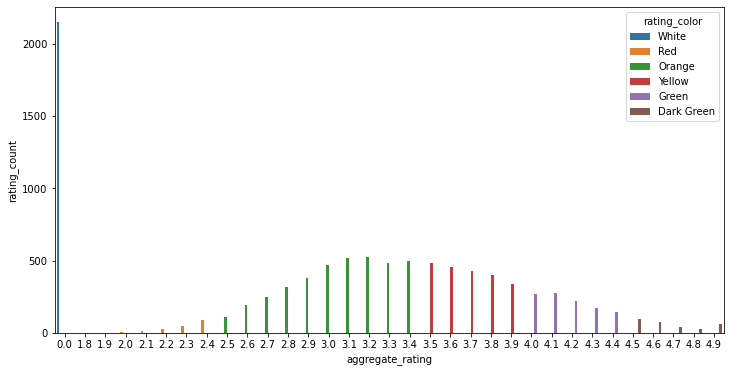

In [35]:
plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x="aggregate_rating", y="rating_count",hue="rating_color",data=ratings)

In [36]:
palette_colour = ["White","Red","Orange","Yellow","Green","DarkGreen"]

<AxesSubplot:xlabel='aggregate_rating', ylabel='rating_count'>

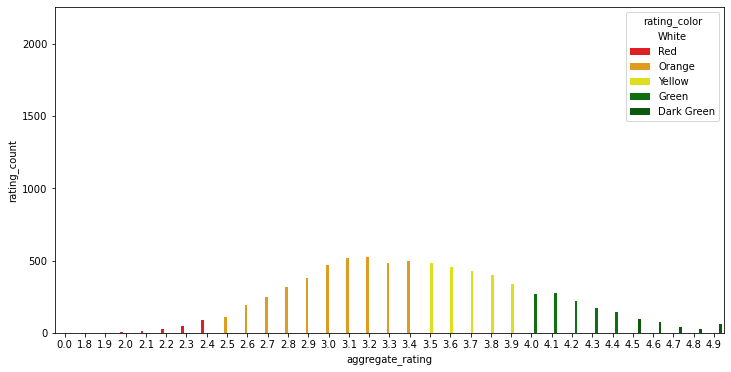

In [37]:
sns.barplot(x="aggregate_rating", y="rating_count",hue="rating_color",data=ratings, palette = palette_colour)





# Observation

1. Not rated count is very high
2. Maximum number of rating is between 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

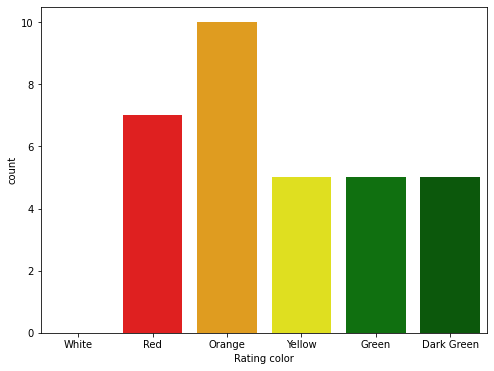

In [39]:
sns.countplot(x='Rating color',data=ratings, palette = palette_colour)

Q.Find the country names that has given 0 rating

In [41]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(4)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


#### Obseravations:

Maximum number of zero ratings are from Indian customer

Q.  Find out which currency is used by which country?

In [43]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


Q. Which countries do have online Delivery options?

In [44]:
final_df[final_df["Has Online delivery"]=="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

#### Observation: 
Count of Indian customers are more in Online Delivery option

Q. List countries which have or have not online delivery options?

In [46]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Q. Create a pie chart for  top 5 cities distribution.

In [47]:
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

In [48]:
final_df.City.value_counts()

New Delhi          5473
Gurgaon            1118
Noida              1080
Faridabad           251
Ghaziabad            25
                   ... 
Quezon City           1
Lorn                  1
Miller                1
Middleton Beach       1
Fernley               1
Name: City, Length: 141, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7f54fc7b50>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029922, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289048, '0.31%')])

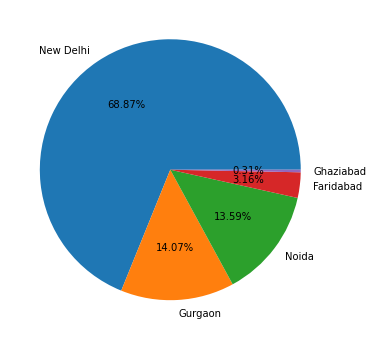

In [49]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')

Q. Find the top 10 Cuisines

In [50]:
cuisines_values=final_df.Cuisines.value_counts().values
cuisines_labels=final_df.Cuisines.value_counts().index

([<matplotlib.patches.Wedge at 0x7f7f100c5af0>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239951, 0.9349956772366363, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Fast Food'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Chinese'),
  Text(-0.5935788454809928, -0.9261015895664211, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.48420625145729884, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.31607341714036097, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.50514632

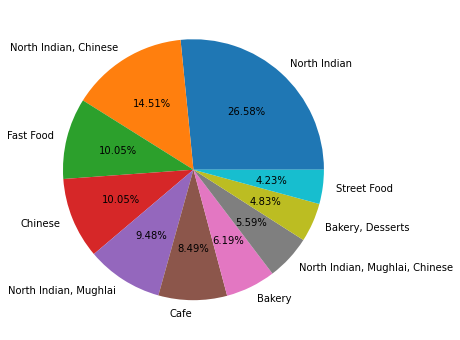

In [51]:
plt.pie(cuisines_values[:10],labels=cuisines_labels[:10],autopct='%1.2f%%')

## Conclusion - Results:
Hence, we successfuly able to find out all following questions answer:
1. Top 3 countries that uses the zomato?
- Maximum number of transctions is in India
- Zomato maximum records are from India followed by USA and united Kingdom

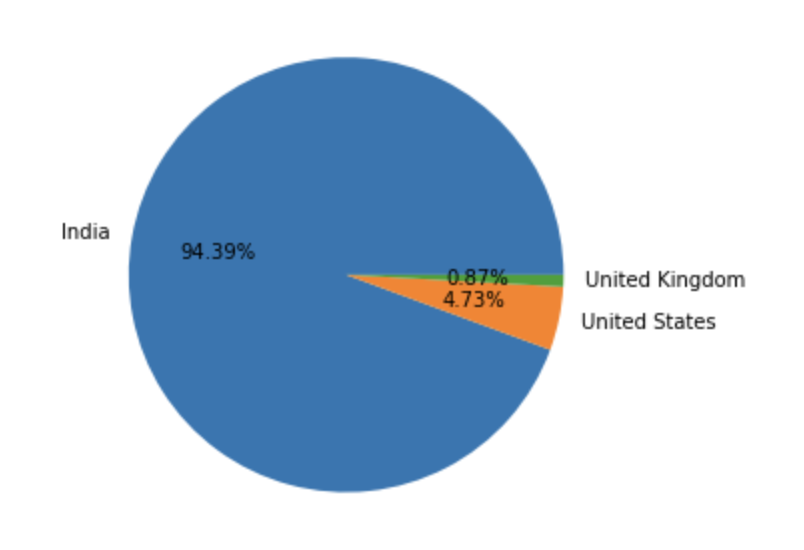

3. Which currency is used by which country?

4. Which countries do have online Delivery options?

5. List countries which have or have not online delivery options?

6. Created a pie chart for top 5 cities distribution?

7. Find the top 10 Cuisines?


#### Q.2.  Find maximum number of rating?

- Not rated count is very high
- Maximum number of rating is between 2.5 to 3.4





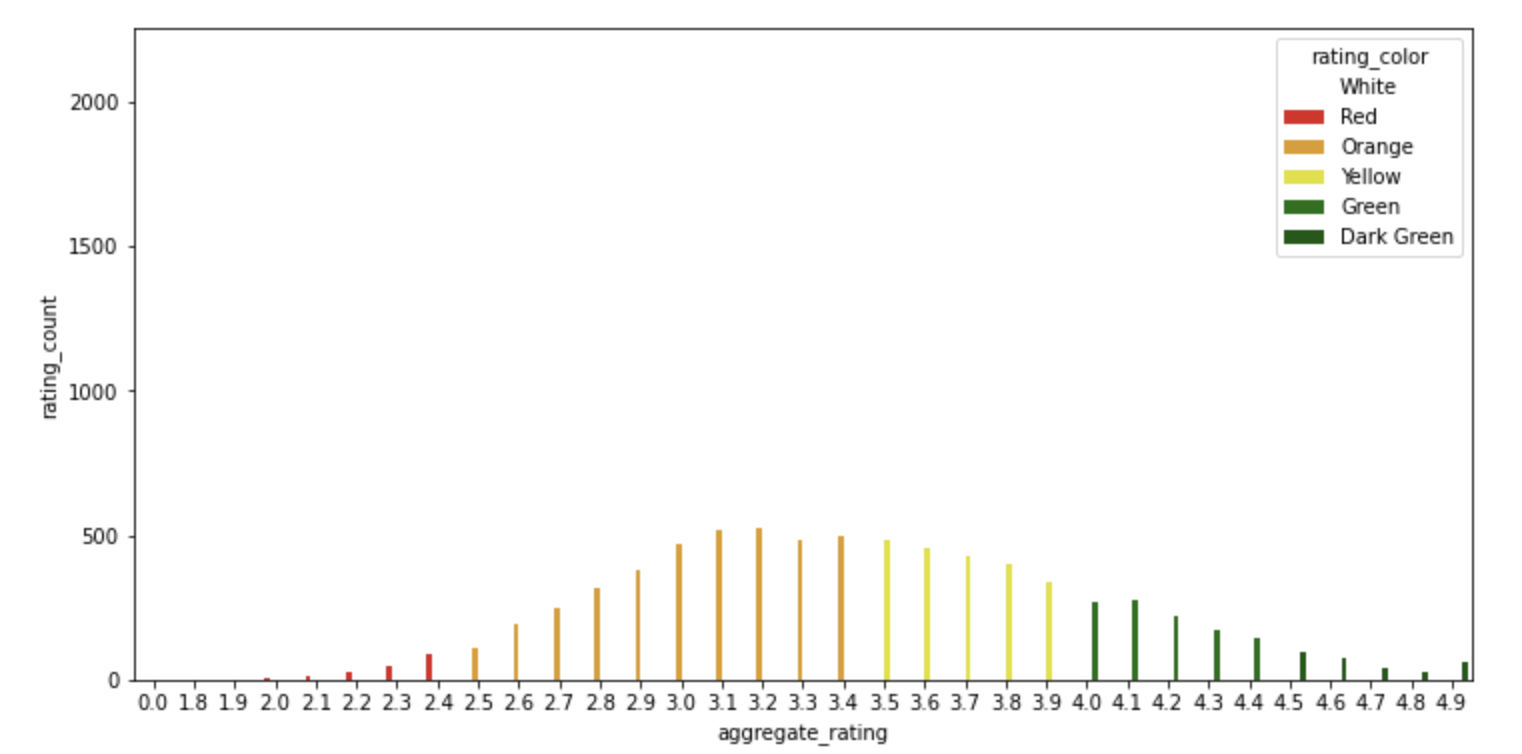

#### Q.3. Find the country names that has given 0 rating

- Maximum number of zero ratings are from Indian customer

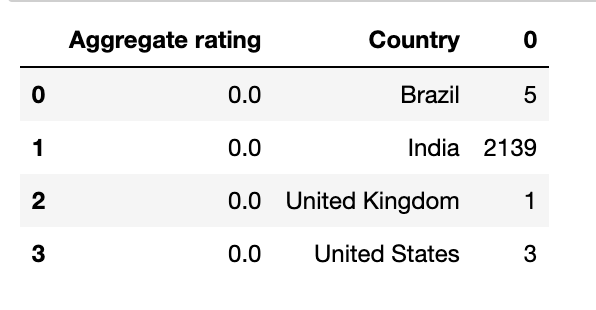


#### Q.4 Which currency is used by which country?

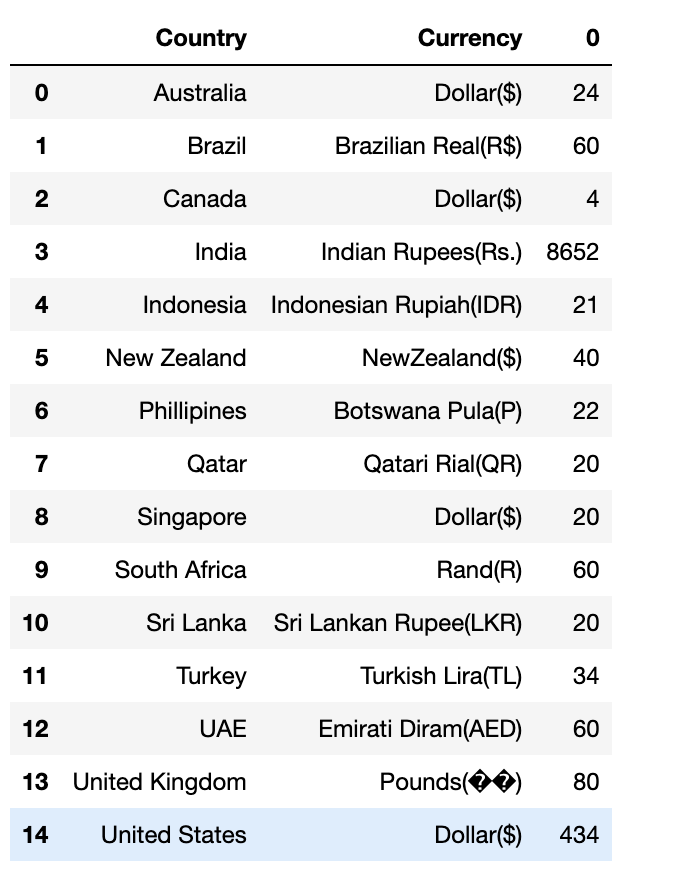

#### Q.5  Which countries do have online Delivery options?

#### Observation:
Count of Indian customers are more in Online Delivery option

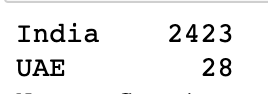

#### Q.6 List countries which have or have not online delivery options? 



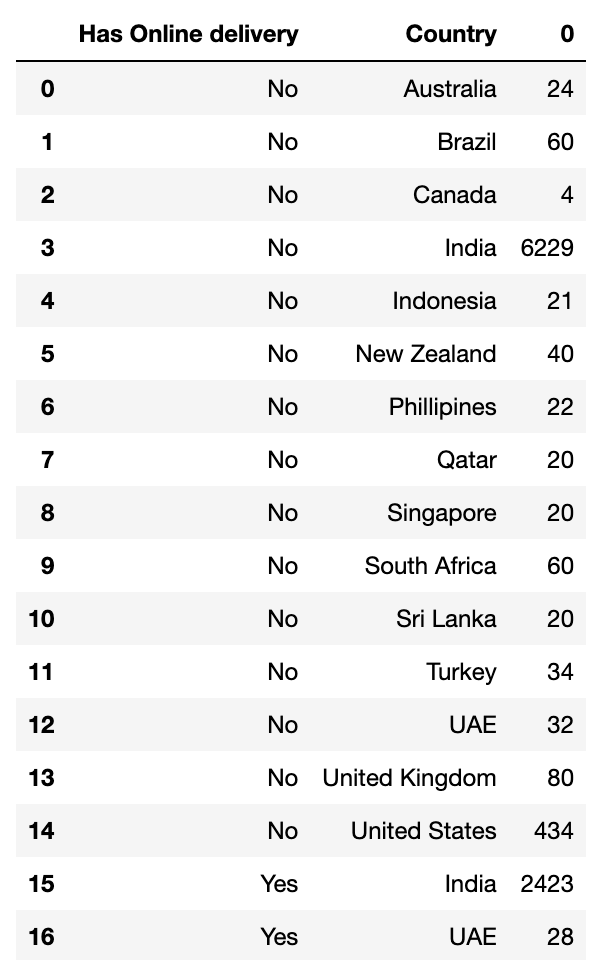

#### Q.7 Created a pie chart for top 5 cities distribution? 

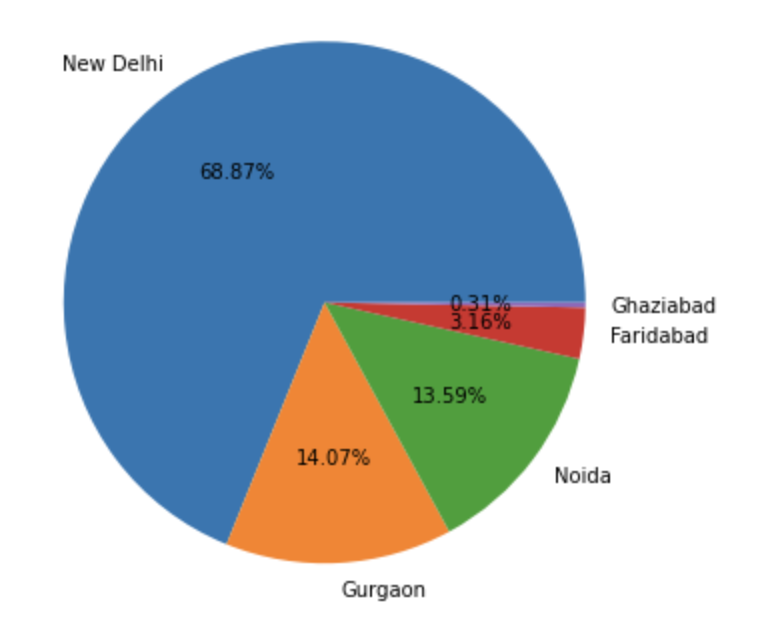

#### Q.8 Find the top 10 Cuisines?

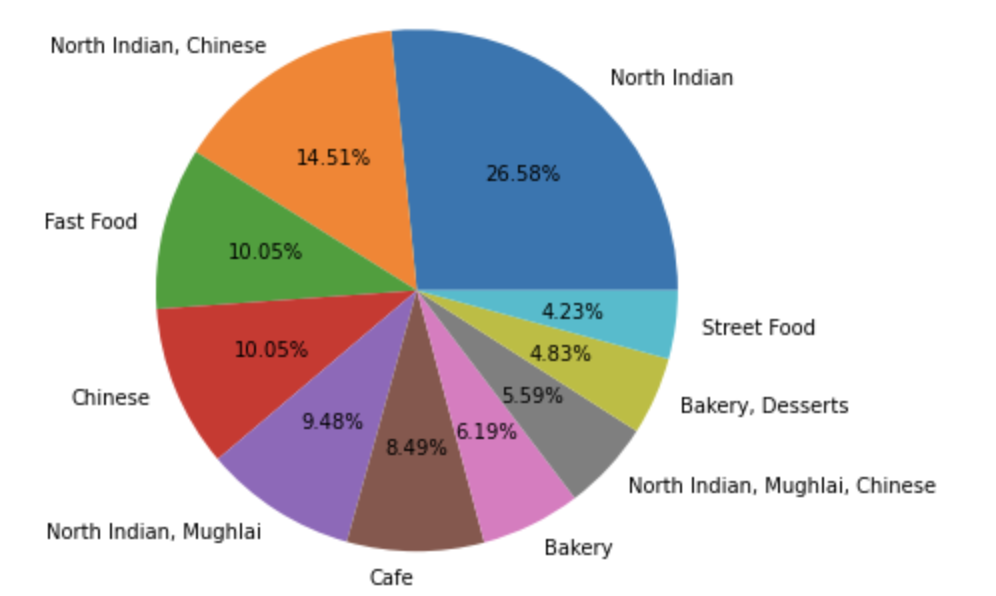

In [ ]:
testing add data this thata